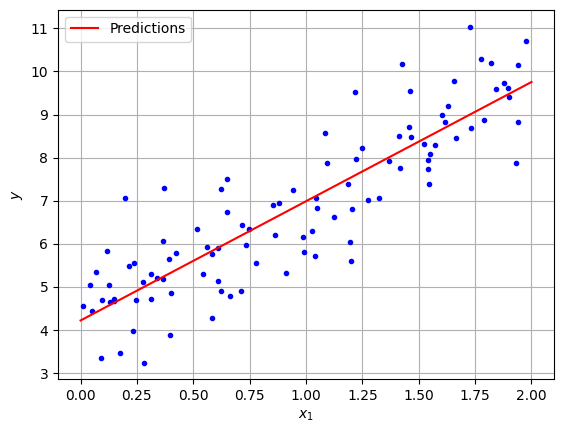

학습된 파라미터: [[4.21509616]
 [2.77011339]]


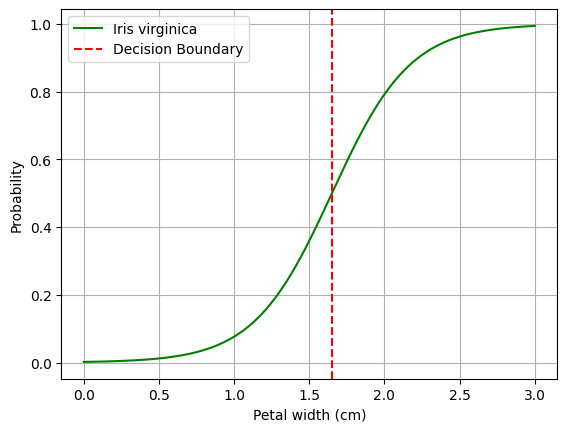

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# 정규 방정식을 사용한 파라미터 계산
X_b = np.c_[np.ones((m, 1)), X]  # X에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best

# 결과 시각화
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

eta = 0.1  # 학습률
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)  # 랜덤 초기화

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print("학습된 파라미터:", theta)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 준비
iris = load_iris()
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica 여부

# 데이터 분할 및 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 결정 경계 시각화
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.axvline(x=decision_boundary, color="r", linestyle="--", label="Decision Boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()
